# Voorbeeldopdracht week 10
Deze week gaan we de analyses van week 1 voortzetten door actief op zoek te gaan naar verbanden en analyses te doen die moeten leiden tot het beantwoorden van een onderzoeksvraag.
We beginnen met het importeren van een dataset

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel('Dataset1.xlsx')

babyboomer = deal[deal['Year_Birth'] == 1960]

deal = data[data['Responded to deal'] == 1]


drunks = data[data['MntWines'] >= 1000]

drunk_kinds = data[drunks['Kidhome'] >= 1 ]

display(deal)

C:\Users\axell\AppData\Local\Temp\ipykernel_1640\2557969755.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drunk_kinds = data[drunks['Kidhome'] >= 1 ]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

Dit is een dataset met klantgegevens. De kolommen zijn
* Geboortejaar
* Opleidingsniveau
* Burgelijke staat
* Inkomen
* Aantal kinderen in huis
* Aantal tieners in huis
* Datum waarop een klant voor het eerst klant is geworden
* Aantal dagen sinds laatste aankoop
* Hoeveelheid geld uitgegeven aan wijn in de laatste 2 jaar
* Hoeveelheid geld uitgegeven aan fruit de afgelopen 2 jaar
* Hoeveelheid geld uitgegeven aan vlees de afgelopen 2 jaar
* Hoeveelheid geld uitgegeven aan vis de afgelopen 2 jaar
* Hoeveelheid geld uitgegeven aan snoep de afgelopen 2 jaar
* Hoeveelheid geld uitgegeven aan goud de afgelopen 2 jaar
* Indicator of de persoon de laatste keer mee deed aan een actie.

Het bedrijf wil uiteindelijk weten welke klanten potentieel gevoelig zijn voor een actie


Bij een dergelijke analyse kunnen allerlei deelvragen bepaald worden. Hieronder wordt een aantal voorbeelden uitgewerkt

1. Geven mensen met een hoger opleidingsniveau meer uit?

In [20]:
# Groeperen per opleidingsniveau. Som van uitgaven
data.groupby(['Education'])['MntWines', 'MntFruits', 'MntMeatProducts', 
                                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'].mean()


C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
2n Cycle,198.182266,28.955665,141.256158,47.482759,34.251232,46.399015
Basic,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333
Graduation,284.268855,30.774623,179.488909,43.149956,31.367347,50.849157
Master,333.075676,21.654054,163.378378,32.100000,21.175676,40.397297
PhD,404.495885,20.049383,168.602881,26.728395,20.222222,32.310700


Zoals je ziet best wel grote verschillen

2. Geven huishoudens met kinderen meer uit aan snoep?

In [22]:
data.groupby(['Kidhome', 'Teenhome'])['MntSweetProducts'].mean().reset_index()


,Kidhome,Teenhome,MntSweetProducts
0,0,0,53.061129
1,0,1,28.700800
2,0,2,19.133333
3,1,0,9.850895
4,1,1,7.521390
5,1,2,11.909091
6,2,0,8.058824
7,2,1,2.870968


Opvallend genoeg zien we dat dat niet het geval is, kunnen we verklaren hoe dat komt? Daarvoor kunnen we kijken hoe de groep zonder kinderen op andere indicatoren verschilt van de andere groepen. Hiervoor hebben we ene nieuwe kolom nodig: wel of geen kinderen

In [26]:
# Nieuwe kolom maken
data['Kinderen'] = data.apply(lambda x: 1 if x['Kidhome'] + x['Teenhome'] > 0 else 0, axis=1)
# Gemiddelde van alle kolommen bekijken
data.groupby('Kinderen').mean()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Responded to deal
Kinderen,,,,,,,,,,,,
0,1968.583072,65705.565561,0.000000,0.000000,49.086207,487.305643,52.357367,372.609718,76.547022,53.061129,64.148903,0.264890
1,1968.894507,46865.626027,0.621099,0.707865,49.118602,230.908240,15.925718,85.045568,21.985019,16.709114,36.006242,0.102996


Een aantal dingen valt op. We zien dat mensen zonder kinderen gemiddeld een hoger inkomen hebben en dat ze in algemene zin dus veel meer uitgaven. Dit valt ook op als we kijken naar het opleidingsniveau

In [27]:
pd.pivot_table(data, index='Education', columns=['Kinderen'], values='Year_Birth', aggfunc='count')

Kinderen,0,1
Education,,
2n Cycle,64,139
Basic,17,37
Graduation,321,806
Master,102,268
PhD,134,352


welke eigenschappen klanten hebben die potentieel gevoelig zijn voor aanbiedingen (kolom Responded to deal)

In [12]:
data.groupby(['Education'])['Responded to deal'].mean()

Education
2n Cycle      0.108374
Basic         0.037037
Graduation    0.134871
Master        0.154054
PhD           0.207819
Name: Responded to deal, dtype: float64

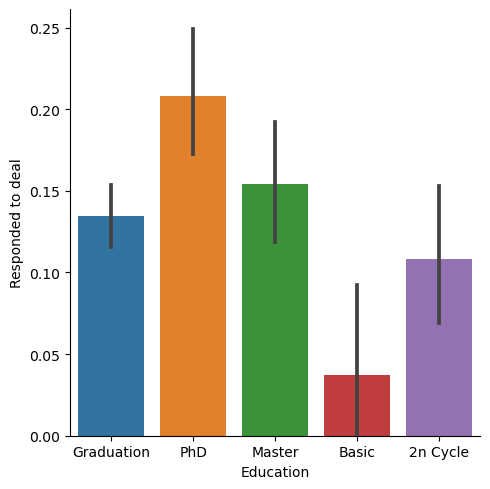

In [13]:
sns.catplot(x='Education', y='Responded to deal',data=data, kind='bar')
plt.ticklabel_format(style='plain', axis='y')

Ga in ieder geval in op 6 kolommen, waarvan minimaal 2 numerieke en 2 categorische

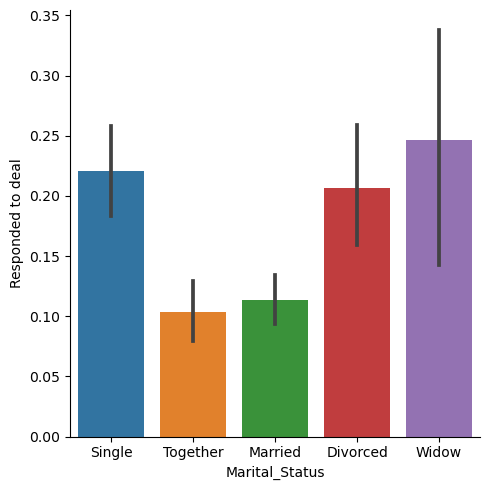

In [30]:
categories = ['Single', 'Together', 'Married', 'Divorced', 'Widow']

sns.catplot(x='Marital_Status', y='Responded to deal',data=data, kind='bar', order= categories )

In [ ]:
uit ons conclusie kwamen we er achter dat vrijgezellen mensen het meest aan de deal hebben.

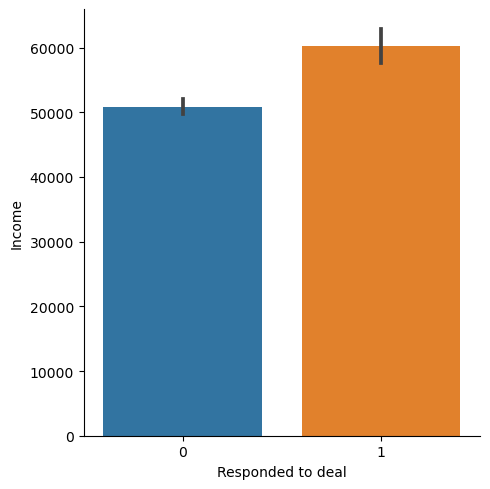

In [32]:
sns.catplot(x='Responded to deal', y='Income',data=data, kind='bar')